[(2.0, 7.0), (1.0, 7.0), (0.0, 7.0), (23.0, 14.0), (24.0, 14.0), (25.0, 14.0), (26.0, 14.0), (27.0, 14.0), (28.0, 14.0), (29.0, 14.0), (0.0, 6.0), (1.0, 6.0), (2.0, 6.0), (2.0, 8.0), (1.0, 8.0), (0.0, 8.0), (23.0, 13.0), (24.0, 13.0), (25.0, 13.0), (26.0, 13.0), (27.0, 13.0), (28.0, 13.0), (29.0, 13.0), (0.0, 0.0), (0.0, 1.0), (0.0, 2.0), (0.0, 3.0), (0.0, 4.0), (0.0, 5.0), (1.0, 5.0), (2.0, 5.0), (2.0, 9.0), (1.0, 9.0), (0.0, 9.0), (0.0, 10.0), (0.0, 11.0), (0.0, 12.0), (0.0, 13.0), (0.0, 14.0), (23.0, 10.0), (23.0, 11.0), (23.0, 12.0), (24.0, 12.0), (25.0, 12.0), (26.0, 12.0), (27.0, 12.0), (28.0, 12.0), (29.0, 12.0), (1.0, 0.0), (1.0, 1.0), (1.0, 2.0), (1.0, 3.0), (1.0, 4.0), (2.0, 4.0), (2.0, 10.0), (1.0, 10.0), (1.0, 11.0), (1.0, 12.0), (1.0, 13.0), (1.0, 14.0), (29.0, 0.0), (29.0, 1.0), (29.0, 2.0), (29.0, 3.0), (24.0, 10.0), (24.0, 11.0), (25.0, 11.0), (26.0, 11.0), (27.0, 11.0), (28.0, 11.0), (29.0, 11.0), (29.0, 4.0), (29.0, 10.0), (29.0, 5.0), (29.0, 9.0), (29.0, 6.0), (29.0,

ValueError: too many values to unpack (expected 2)

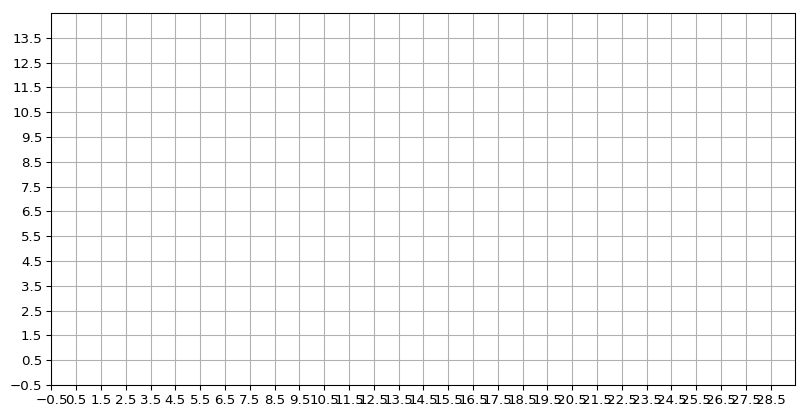

In [67]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from envSetup import EnvSetup
from customizedShape import CustomizedShape
from pathfinder import Pathfinder

map_width = EnvSetup().map_width
map_height = EnvSetup().map_height
n_robot = EnvSetup().n_robot
n_target = EnvSetup().n_target

data_robot = np.zeros(n_robot, dtype=[('position', float, 2),
                                      ('color',    float, 4)])

data_robot['position'] = np.array(EnvSetup().nodes_robot_initializer)
data_robot['color'] = np.repeat([[0., 1., 0., 1.]], n_robot, axis=0)


pathfinderObject = Pathfinder()
pathfinderObject.breadth_first_search()
# path = [[path_robot_1], [path_robot_2], ..., [path_robot_n]]
came_from = pathfinderObject.came_from
cost_so_far = pathfinderObject.cost_so_far
path = []
x = []
y = []
for robot_i  in np.arange(n_robot):
    path.append(pathfinderObject.reconstruct_path(tuple(data_robot['position'][robot_i])))
    x.append([path[robot_i][ix][0] for ix in range(len(path[robot_i]))])
    y.append([path[robot_i][ix][1] for ix in range(len(path[robot_i]))])
    
        
    
fig = plt.figure(num="besiege", figsize=(10, 10), dpi=96, facecolor='w', edgecolor='k')
ax = fig.add_subplot(1, 1, 1)
ax.set_xlim(0-0.5, map_width-0.5)
ax.set_ylim(0-0.5, map_height-0.5)
ax.set_aspect('equal')    
x_ticks = np.arange(0-0.5, map_width-0.5, 1)
y_ticks = np.arange(0-0.5, map_height-0.5, 1)
ax.set_xticks(x_ticks)
ax.set_yticks(y_ticks)
ax.grid(True)


# print("path:",path[0])
# path[0][0]
# x = [path[0][ix][0] for ix in range(len(path[0]))]
# y = [path[0][ix][1] for ix in range(len(path[0]))]
# print("x:", x)
# print("y:", y)
# print("shape:", np.array(x).shape)

# lines = []
# for ix in np.arange(len(x)):
#     lines.append(plt.plot(x[ix], y[ix], '--', lw=1))

# lines
    
# ani = animation.ArtistAnimation(fig, lines)

# x = np.arange(30)
# y = np.sin(x)
# line, = plt.plot(x[1], y[1], '--', lw=1)
# line, = ax.plot(np.array(x), np.array(y), 'o-', lw=1)
# line.set_data([], [])


# print("came_from", came_from)
# print("came_from shape", len(came_from))
# print("type:", type(came_from))
# item = came_from.popitem()
# current = item[0]
# parent = item[1]
# print("current:", current)
# print("current[0]:", current[0])

# dot_cameFrom = []
# count = 0
# while len(came_from) != 0:
#     item = came_from.popitem()
#     current = item[0]
#     parent = item[1]  
    
#     if parent == None:
#         marker_son = ''
#     elif current[0] == parent[0] and current[1] > parent[1]:
#         marker_son = 'v'
#     elif current[0] == parent[0] and current[1] < parent[1]:
#         marker_son = '^'
#     elif current[0] > parent[0] and current[1] == parent[1]:
#         marker_son = '<'
#     elif current[0] < parent[0] and current[1] == parent[1]:
#         marker_son = '>'
#     else:
#         marker_son = 'D'
    
#     dot_cameFrom.append(plt.annotate(marker_son, xy=current, ha='center', va='center'))


# print("cost_so_far:", cost_so_far)
# item = cost_so_far.popitem()
# print("item:", item)
# pos = item[0]
# pos_cost = item[1]
# print("pos:", pos)
# print("pos:", pos_cost)
# dot_cost_so_far = []
# while len(cost_so_far) != 0:
#     item = cost_so_far.popitem()
#     pos = item[0]
#     pos_cost = item[1]
#     dot_cost_so_far.append(plt.annotate(str(pos_cost), xy=pos, ha='center', va='center'))


dot_came_from_cost = []
current = []
parent = []
item_cost_so_far = []
while len(came_from) != 0:
    item_came_from = came_from.popitem()
    if item_came_from[1] != None:
        current.append(item_came_from[0])
        parent.append(item_came_from[1])
        item_cost_so_far.append(cost_so_far.get(item_came_from[0]))
print(current)
list_cost_so_far = [str(ix) for ix in item_cost_so_far]
while len(current) != []:
    dot_came_from_cost.append(plt.annotate(list_cost_so_far,
                                               ha='center', va='center', alpha=0.4,
                                               xytext=current,
                                               xy=parent,
                                               arrowprops={'arrowstyle': '->', 'alpha': 0.4}))
        
        



plt.show()